In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import files

In [5]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, encoding='latin1', low_memory=False, sep=r'\s+', names=col_names)

Saving housing.csv to housing.csv


In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


REGRESSÃO NÃO PARAMÉTRICA A PARTIR DOS CONCEITOS DA JANELA DE DENSIDADE DOS PONTOS


Utilizando O kernel density de Gauss.


O objetivo é comparar uma regressão não paramétrica com um modelo de regressão polinomial

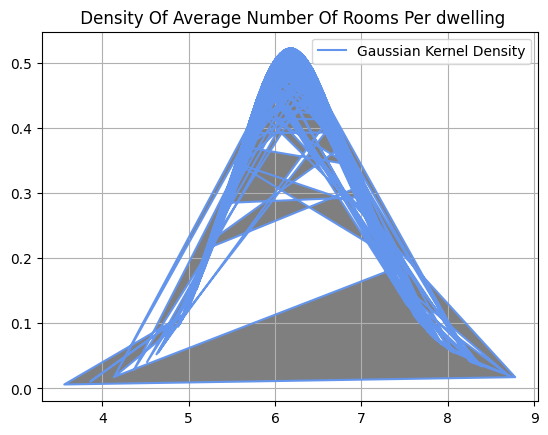

In [117]:
from sklearn.neighbors import KernelDensity
x = df['RM'].values.reshape(-1, 1)

fig, ax = plt.subplots()

kde = KernelDensity(kernel='gaussian', bandwidth=0.5, algorithm="kd_tree").fit(x)
log_dens = kde.score_samples(x)

ax.fill(x, np.exp(log_dens), fc='black', alpha=0.5)
ax.plot(x, np.exp(log_dens), color="cornflowerblue", linestyle='-', label="Gaussian Kernel Density")

ax.set_title(" Density Of Average Number Of Rooms Per dwelling")
ax.grid(True)
ax.legend(loc='upper right')

plt.show()

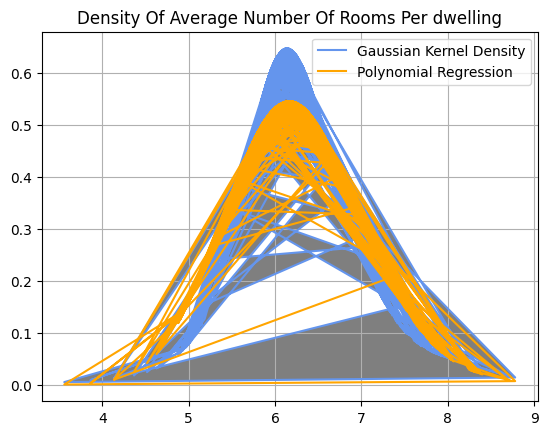

In [139]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots()
x = df['RM'].values.reshape(-1, 1)

kde = KernelDensity(kernel='gaussian', bandwidth=0.3, algorithm="kd_tree").fit(x)
log_dens = kde.score_samples(x)

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)
reg = LinearRegression().fit(x_poly, log_dens)
y_poly = reg.predict(x_poly)

ax.fill(x, np.exp(log_dens), fc='black', alpha=0.5)
ax.plot(x, np.exp(log_dens), color="cornflowerblue", linestyle='-', label="Gaussian Kernel Density")

ax.plot(x, np.exp(y_poly), color="orange", linestyle='-', label="Polynomial Regression")

ax.set_title("Density Of Average Number Of Rooms Per dwelling")
ax.grid(True)
ax.legend(loc='upper right')

plt.show()

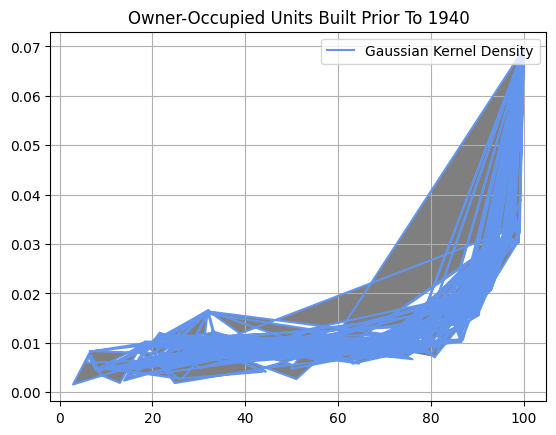

In [122]:
from sklearn.neighbors import KernelDensity

x = df['AGE'].values.reshape(-1, 1)
fig, ax = plt.subplots()

kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(x)
log_dens = kde.score_samples(x)

ax.fill(x, np.exp(log_dens), fc='black', alpha=0.5)
ax.plot(x, np.exp(log_dens), color="cornflowerblue", linestyle='-', label="Gaussian Kernel Density")

ax.set_title("Owner-Occupied Units Built Prior To 1940")
ax.grid(True)
ax.legend(loc='upper right')

plt.show()

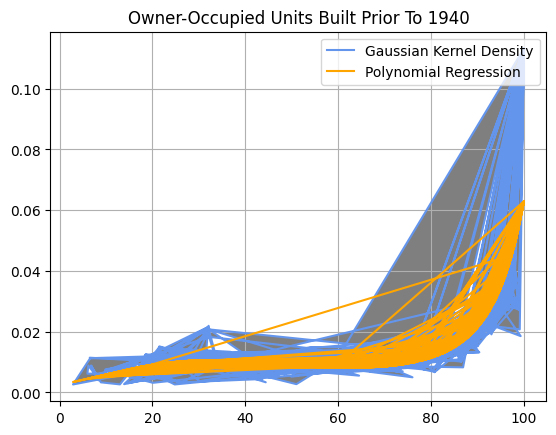

In [142]:
x = df['AGE'].values.reshape(-1, 1)

kde = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(x)
log_dens = kde.score_samples(x)

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)
reg = LinearRegression().fit(x_poly, log_dens)
y_poly = reg.predict(x_poly)

fig, ax = plt.subplots()

ax.fill(x, np.exp(log_dens), fc='black', alpha=0.5)
ax.plot(x, np.exp(log_dens), color="cornflowerblue", linestyle='-', label="Gaussian Kernel Density")

ax.plot(x, np.exp(y_poly), color="orange", linestyle='-', label="Polynomial Regression")

ax.set_title("Owner-Occupied Units Built Prior To 1940")
ax.grid(True)
ax.legend(loc='upper right')

plt.show()
